**MAJORITY OF THIS CODE IS FROM THE PREVIOUS NOTEBOOK. SKIP TO THE BOTTOM TO LOOK AT THE DESCRIPTION REPRESENTATION CODE**

In [129]:
# import padnas
import pandas as pd

In [130]:
netflix_data_path = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/raw/netflix_data.csv'

# Read in the file and print out the DataFrame
netflix_df = pd.read_csv(netflix_data_path)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Dataset Description:** This dataset contains information about movies and TV shows available on Netflix. Each record represents a movie/show with attributes such as director, cast, country of origin, release year, Netflix listing categories, and a brief description of the recording. It also includes metadata like the date it was added to Netflix, its age rating, and its duration (in minutes for movies and seasons for shows). The unit of analysis are meaningful columns that may affect its rating such as Director, Country, Cast, and rating.


**The data dictionary:**

Netflix dataset

'show_id': A unique id given to every show/movie in the dataset

'type': Represents whether the recording is a movie or show on Netflix

'title': The title of the movie or show listed on Netflix

'director': Director(s) of movie or show

'cast': Actors involved in movie or show

'country': The country the movie or show was made in

'date_added': Date movie or show was added to Netflix

'release_year': Year the show/movie was officially released to public

'rating': Appropriate Age Registriction/Recommendation of show/movie

'duration': Length in time of movie/show. Movies represented in minutes and shows represented with season count.

'listed_in': Categories on netflix the show/movie is listed in

'Description': Paragraph description of show/movie

In [131]:
netflix_df.shape

(8807, 12)

In [132]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [133]:
netflix_df.index

RangeIndex(start=0, stop=8807, step=1)

In [134]:
(
    netflix_df['show_id'].unique().shape,
    netflix_df['title'].unique().shape,
)

((8807,), (8807,))

In [135]:
netflix_df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [136]:
 #create a list of the columns that are categorical and those that are integer and those that have string values

import numpy as np
numerical = []
categorical = []
string = []

categorical_type = {netflix_df['title'].dtype}


for column in netflix_df.columns:
# check if the column contains more than 10 unique values then it is not categorical
  if netflix_df[column].unique().shape[0] > 10 and netflix_df[column].dtype in categorical_type:
    string.append(column)
  elif netflix_df[column].dtype in categorical_type:
    categorical.append(column)
  else:
    numerical.append(column)

# second check for numerical values
#HINT: use numpy datatypes

# otherwise it would be String values

print("Numerical columns: ", numerical)
print("Categorical columns: ", categorical)
print("String columns: ", string)

Numerical columns:  ['release_year']
Categorical columns:  ['type']
String columns:  ['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [137]:
# convert all the columns in the categorical list to be of the type category

for column in categorical:
  netflix_df[column] = netflix_df[column].astype('category')

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


In [138]:
# check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
netflix_df.duplicated().sum()

0

**Cleaning the Data:**

We cean the data by first seeing what columns are missing values. By looking at the info of the columns we can see that the columns director, cast, country, date_added, release_year, rating, and duration are all missing values. However, most of these columns are missing a very minimal number of columns, so I simply drop the rows with missing values in these columns.

In [139]:
# Print out the column labels for the full dataset of artworks and artist info
# paintings.info()
netflix_df.info()

netflix_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [140]:
netflix_df = netflix_df.dropna(subset=['cast', 'country', 'date_added', 'release_year', 'duration'])

netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7293 entries, 1 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7293 non-null   object  
 1   type          7293 non-null   category
 2   title         7293 non-null   object  
 3   director      5333 non-null   object  
 4   cast          7293 non-null   object  
 5   country       7293 non-null   object  
 6   date_added    7293 non-null   object  
 7   release_year  7293 non-null   int64   
 8   rating        7290 non-null   object  
 9   duration      7293 non-null   object  
 10  listed_in     7293 non-null   object  
 11  description   7293 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 691.0+ KB


After droppping rows with missing values in columns cast, country, date_added, release_year, and duration, we can see that our dataset now has 7293 entries or rows. The only columns left with missing values is director and rating. We chose not to drop rows with the leftover missing rating values because when we did a test merge with the other dataset, there was no missing values. However, we must still decide what to do with the director column's missing values. We decided that it might be valuable to label the director as "unknown" if it missing because we believe that a value of "unknown" for a director might show that the movie/show is not as popular as other recordings. This means that a row with a director value of "unknown" may correlate to lower idmb scores and ratings.



When studying the dataset, we released the columns 'listed_in' and 'cast' are lists of strings. This may be hard to work with for future dataset operations. We decided to create two new columns (num_listed_in and first_cast), which represented the number of genres the entry is involved in and the name of the first listed cast member (who we believe is the most popular). In the future, we hope to use these two new columns to find correlations between the genres/cast members of the entries to their idmb scores and votes.

In [141]:
netflix_df.loc[:, 'director'] = netflix_df['director'].fillna('Unknown')

#print(netflix_df.head())

num_distinct_genres = netflix_df['listed_in'].nunique()
print("Number of distinct genres:", num_distinct_genres)

#print(netflix_df.info())
netflix_df = netflix_df.copy()
netflix_df.loc[:, 'num_listed_in'] = netflix_df['listed_in'].apply(lambda x: len(x.split(',')))

#print(netflix_df.head())

netflix_df.loc[:, 'first_cast'] = netflix_df['cast'].apply(lambda x: x.split(',')[0] if pd.notna(x) else 'Unknown')

print(netflix_df.info())

Number of distinct genres: 489
<class 'pandas.core.frame.DataFrame'>
Index: 7293 entries, 1 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   show_id        7293 non-null   object  
 1   type           7293 non-null   category
 2   title          7293 non-null   object  
 3   director       7293 non-null   object  
 4   cast           7293 non-null   object  
 5   country        7293 non-null   object  
 6   date_added     7293 non-null   object  
 7   release_year   7293 non-null   int64   
 8   rating         7290 non-null   object  
 9   duration       7293 non-null   object  
 10  listed_in      7293 non-null   object  
 11  description    7293 non-null   object  
 12  num_listed_in  7293 non-null   int64   
 13  first_cast     7293 non-null   object  
dtypes: category(1), int64(2), object(11)
memory usage: 804.9+ KB
None


**Representing the List columns**

To further represent the list columns 'cast' and 'listed_in', we decided to create two more columns called 'cast_freq_mean' and 'genre_freq_mean,' which uses averages to help us get a better understanding and a general numerical representation of the lists for each entry.

For cast_freq_mean, we counted how many times each actor appeared in the dataset using a Counter. Then, for each row, we calculated the mean frequency of its listed actors, representing how "popular" the cast is based on their past appearances. This gives a numerical value that shows cast familiarity.

For genre_freq_mean, we followed a similar approach by counting how often each genre appeared in the dataset. Then, for each row, we computed the average occurrence of its listed genres, providing a measure of how common or mainstream the movie’s genres are. This helps quantify how niche a movie's category is.


The comments in the code give a better idea of the process

In [142]:
from collections import Counter

# Get rid of all white spaces and split the cast members by using the commas as delimiter
cast_lists = netflix_df['cast'].apply(lambda c: [m.strip() for m in c.split(',')])

# Takes all lists from entries and makes it into one list
all_cast_members = [m for sublist in cast_lists for m in sublist]

# Count all occurrences of each member in into a Map
cast_counter = Counter(all_cast_members)

# Function to calculate mean frequency
def mean_cast_freq(cast_str):
    members = [m.strip() for m in cast_str.split(',')]
    return sum(cast_counter[m] for m in members) / len(members)

netflix_df['cast_freq_mean'] = netflix_df['cast'].apply(mean_cast_freq)

netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_listed_in,first_cast,cast_freq_mean
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,Ama Qamata,1.157895
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,3,Mayur More,2.000000
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,Kofi Ghanaba,1.000000
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,Mel Giedroyc,2.000000
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2,Melissa McCarthy,5.090909


<Axes: ylabel='Frequency'>

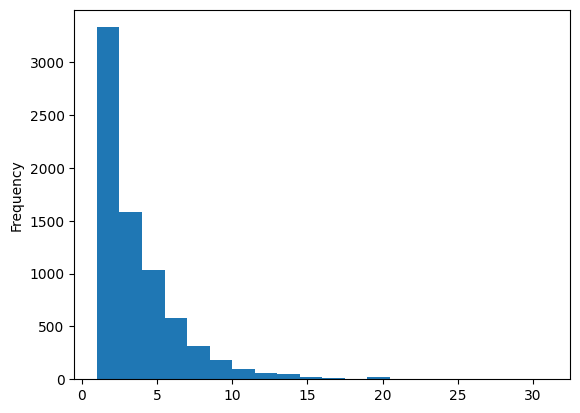

In [143]:
netflix_df['cast_freq_mean'].plot.hist(bins=20)

<Axes: >

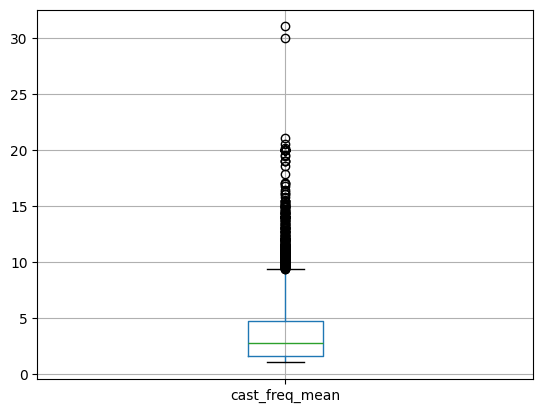

In [144]:
netflix_df.boxplot(column='cast_freq_mean')

In [145]:
netflix_df['cast_freq_mean'].describe()

,cast_freq_mean
count,7293.000000
mean,3.571535
std,2.824646
min,1.000000
25%,1.600000
50%,2.714286
75%,4.700000
max,31.000000


In [146]:
iqr = (netflix_df['cast_freq_mean'].quantile(0.75) - netflix_df['cast_freq_mean'].quantile(0.25))
netflix_df[netflix_df['cast_freq_mean'] > netflix_df['cast_freq_mean'].quantile(0.75) + 1.5 * iqr]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_listed_in,first_cast,cast_freq_mean
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,1,Adam Sandler,10.363636
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,3,Madhuri Dixit,9.555556
192,s193,Movie,C Kkompany,Sachin Yardi,"Mithun Chakraborty, Tusshar Kapoor, Anupam Khe...",India,"August 27, 2021",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...",Three broke friends pose as an underworld gang...,3,Mithun Chakraborty,16.000000
202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...,3,Tusshar Kapoor,13.166667
205,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Sushmita Sen, Rambha, Anupam Kher, Sa...",India,"August 27, 2021",2001,TV-14,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...,3,Govinda,10.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,s8519,TV Show,The Story of God with Morgan Freeman,Unknown,Morgan Freeman,United States,"February 1, 2019",2017,TV-14,2 Seasons,Docuseries,Host Morgan Freeman explores religion's role i...,1,Morgan Freeman,19.000000
8519,s8520,TV Show,The Story of Us with Morgan Freeman,Unknown,Morgan Freeman,United States,"February 1, 2019",2017,TV-14,1 Season,Docuseries,"Explore the forces of love, belief, power, war...",1,Morgan Freeman,19.000000
8551,s8552,TV Show,The War: A Film by Ken Burns and Lynn Novick,Unknown,Keith David,United States,"February 22, 2017",2007,TV-14,1 Season,Docuseries,A seven-part series brings World War II to lif...,1,Keith David,15.000000
8641,s8642,Movie,Turbo,David Soren,"Ben Schwartz, Bill Hader, Luis Guzmán, Snoop D...",United States,"September 12, 2019",2013,PG,96 min,"Children & Family Movies, Comedies",A speed-obsessed snail who dreams of being the...,2,Ben Schwartz,10.000000


In [147]:
# Get rid of all white spaces and split the genres by using the commas as delimiter
genre_lists = netflix_df['listed_in'].apply(lambda g: [genre.strip() for genre in g.split(',')])

# Takes all lists from entries and makes it into one list
all_genres = [g for sublist in genre_lists for g in sublist]

# Count occurrences of genre and making a Map
genre_counter = Counter(all_genres)

# Function to calculate mean frequency
def mean_genre_freq(genres_str):
    genres = [g.strip() for g in genres_str.split(',')]
    return sum(genre_counter[g] for g in genres) / len(genres)

netflix_df['genre_freq_mean'] = netflix_df['listed_in'].apply(mean_genre_freq)

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,Ama Qamata,1.157895,597.666667
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,3,Mayur More,2.000000,608.000000
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,Kofi Ghanaba,1.000000,1814.666667
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,Mel Giedroyc,2.000000,171.000000
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2,Melissa McCarthy,5.090909,1942.000000


<Axes: ylabel='Frequency'>

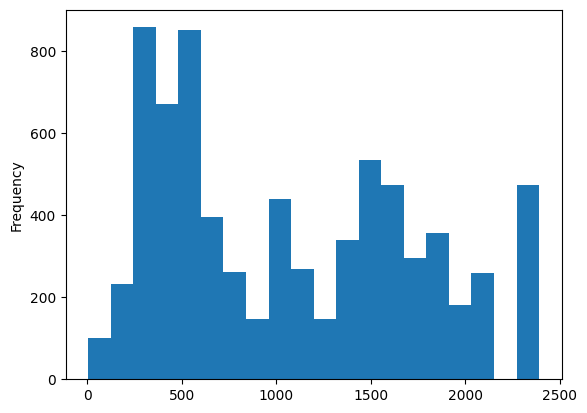

In [148]:
netflix_df['genre_freq_mean'].plot.hist(bins=20)

<Axes: >

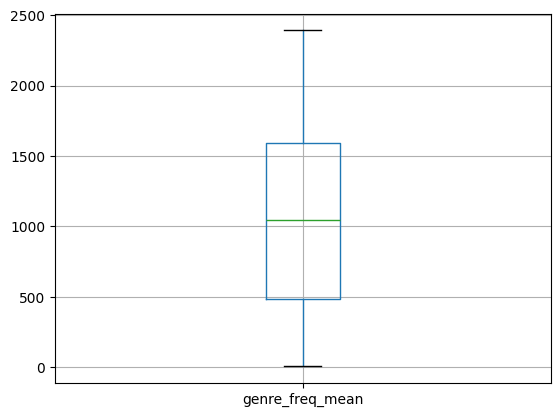

In [149]:
netflix_df.boxplot(column='genre_freq_mean')

In [150]:
netflix_df = netflix_df.copy()
netflix_df['duration'] = netflix_df.apply(lambda row: int(row['duration'].split()[0]) if row['type'] == 'TV Show' else 1, axis=1)
netflix_df.rename(columns={'duration': 'num_releases'}, inplace=True)
print(netflix_df[['type', 'num_releases']].head())
print(netflix_df.info())

      type  num_releases
1  TV Show             2
4  TV Show             2
7    Movie             1
8  TV Show             9
9    Movie             1
<class 'pandas.core.frame.DataFrame'>
Index: 7293 entries, 1 to 8806
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   show_id          7293 non-null   object  
 1   type             7293 non-null   category
 2   title            7293 non-null   object  
 3   director         7293 non-null   object  
 4   cast             7293 non-null   object  
 5   country          7293 non-null   object  
 6   date_added       7293 non-null   object  
 7   release_year     7293 non-null   int64   
 8   rating           7290 non-null   object  
 9   num_releases     7293 non-null   int64   
 10  listed_in        7293 non-null   object  
 11  description      7293 non-null   object  
 12  num_listed_in    7293 non-null   int64   
 13  first_cast       7293 non-null   objec

**Understanding our Descriptions**

We will turn our descriptions into numerical representations to see whether it has correlation to the imdb scores. First, we create two new columns called 'desc_character_count' and 'desc_word_count' which represent the character count and word count in the description of the entry. Then, we want to see the most popular words that are used in the descriptions for the entire dataset. We use CountVectorizer to create a bag of words and represent each description as a vector of word counts, meaning we can see how many times that word appears in the description. Unfortunately, the bag of words is 17152, which is very large. We want to analyze the descriptions to see if they contain the most popular words. We write code to find out what the 50 most common appearing words are. From there, I create three new columns (twoWord, threeWord, fourWord), to see if these entries contain at least 2, 3, or 4 of the most common 50 words. I also graph this distribution as well

In [151]:
from sklearn.feature_extraction.text import CountVectorizer

# Create vectors representing word count for each description
vector = CountVectorizer(stop_words='english')
matrix = vector.fit_transform(netflix_df['description'])
print(matrix.shape)
bowDf = pd.DataFrame(matrix.toarray())

# Two new columns for character and word count of description
netflix_df['desc_character_count'] = netflix_df['description'].apply(len)
netflix_df['desc_word_count'] = netflix_df['description'].apply(lambda x: len(x.split()))

# Find the top 50 most common words
word_counts = bowDf.sum(axis=0)
top_words = word_counts.sort_values(ascending=False).index.tolist()[:50]

#netflix_df['oneWord'] = bowDf[top_words].sum(axis=1) > 0

# If description contains two or more words in the top 50
netflix_df['twoWord'] = bowDf[top_words].sum(axis=1) > 1
# If description contains three or more words in the top 50
netflix_df['threeWord'] = bowDf[top_words].sum(axis=1) > 2
# If description contains four or more words in the top 50
netflix_df['fourWord'] = bowDf[top_words].sum(axis=1) > 3

#print(netflix_df['oneWord'].sum())
print(netflix_df['twoWord'].sum())
print(netflix_df['threeWord'].sum())
print(netflix_df['fourWord'].sum())




(7293, 17152)
3033
1579
710


In [152]:
print(netflix_df.head())

  show_id     type                          title         director  \
1      s2  TV Show                  Blood & Water          Unknown   
4      s5  TV Show                   Kota Factory          Unknown   
7      s8    Movie                        Sankofa     Haile Gerima   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   
9     s10    Movie                   The Starling   Theodore Melfi   

                                                cast  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
1                                       South Africa  September 24, 2021   
4                                              India  September 24, 2021   
7  United Stat

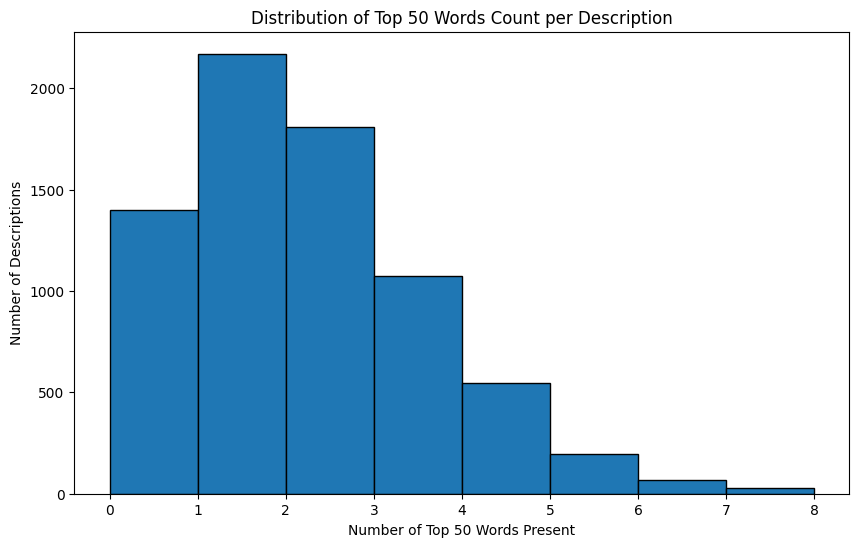

In [153]:
top_words_count = bowDf[top_words].sum(axis=1)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(top_words_count, bins=range(int(top_words_count.max())), edgecolor='black')
plt.xlabel("Number of Top 50 Words Present")
plt.ylabel("Number of Descriptions")
plt.title("Distribution of Top 50 Words Count per Description")
plt.show()

In [154]:
#netflix_df.to_csv('netflix_film_data.csv', index=False)